In [1]:
import cPickle as pkl
import numpy

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import skimage
import skimage.transform
import skimage.io
from cnn_util import *

from PIL import Image
%matplotlib inline
%run model_tensorflow.py

In [2]:
generated_words, alpha_list = test()

preprocessing word counts and creating vocab based on word count threshold 30
filtered words from 20326 to 2942


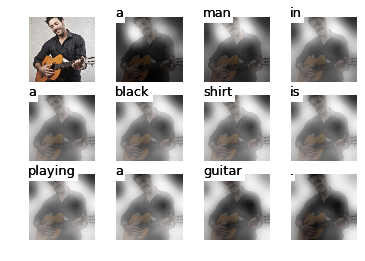

In [3]:
img = crop_image('acoustic-guitar-player.jpg')

alphas = np.array(alpha_list).swapaxes(1,2)

n_words = alphas.shape[0] + 1
w = numpy.round(numpy.sqrt(n_words))
h = numpy.ceil(numpy.float32(n_words) / w)

plt.subplot(w, h, 1)
plt.imshow(img)
plt.axis('off')

smooth = True

for ii in xrange(alphas.shape[0]):
    plt.subplot(w, h, ii+2)
    lab = generated_words[ii]
    
    plt.text(0, 1, lab, backgroundcolor='white', fontsize=13)
    plt.text(0, 1, lab, color='black', fontsize=13)
    plt.imshow(img)
    
    if smooth:
        alpha_img = skimage.transform.pyramid_expand(alphas[ii,0,:].reshape(14,14), upscale=16, sigma=20)
    else:
        alpha_img = skimage.transform.resize(alphas[ii,0,:].reshape(14,14), [img.shape[0], img.shape[1]])
        
    plt.imshow(alpha_img, alpha=0.8)
    plt.set_cmap(cm.Greys_r)
    plt.axis('off')
plt.show()

In [39]:
alpha_img.shape

(224, 224)

In [40]:
alphas.shape

(10, 1, 196)